In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('/home/jschwab/Research/mesa4/styles/mesa.mplstyle')

In [2]:
import string
import os

In [3]:
import mesa_reader as mr

# Figure 5

In [5]:
def read_tony(name):
    filename = os.path.join('./data-from-tony/', name)
    columns = [
        ('T_center', float),
        ('Rho_center', float),
        ('Mconv', float),
        ('e49', float), # energy needed to make model (above cold WD) (10^49 erg)
    ]
    kwargs = {"dtype": columns,}
    return np.genfromtxt(filename, **kwargs)

In [8]:
files = ("1.35.dat", "1.35.2e8.dat", "1.37.dat", "1.37.2e8.dat")

In [9]:
mm = mr.MesaData("mesa_output/LOGS-P17/history.data")

0.274667967959 5.80569553941e-05 0.443303711488 8.56163807918e-05


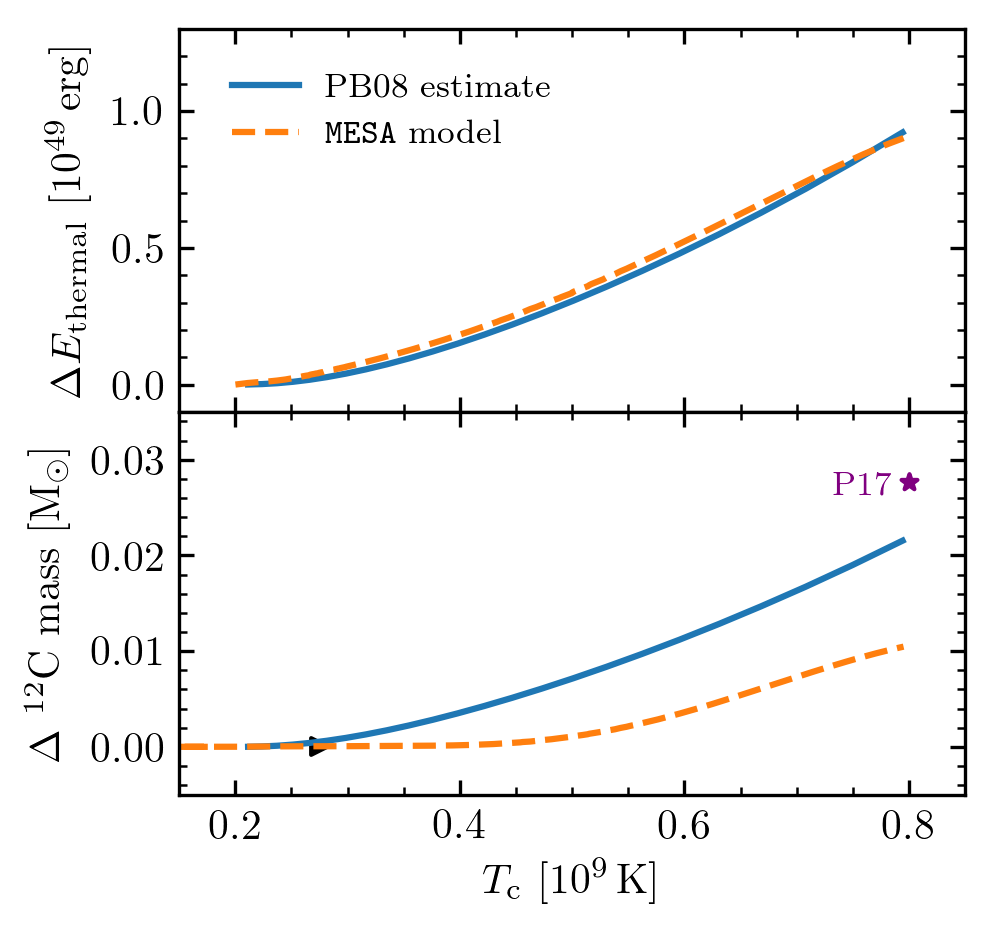

In [95]:
def get_xs_and_ys(name):
    data = read_tony(name)
    Tc = data['T_center']/1e9
    energy = data['e49']
    return Tc, energy

burnfac = 2.14e17 * 2e33 / 1e49

fig, axs = plt.subplots(2, sharex=True)
ax = axs[0]
ax2 = axs[1]
best_file = "1.37.2e8.dat"
xs, ys = get_xs_and_ys(best_file)
idx = np.argmin(np.abs(xs-0.85))
ax.plot(xs[:idx], ys[:idx], label=r'PB08 estimate')
ax2.plot(xs[:idx], ys[:idx]/burnfac)
xs = 10**(mm.log_center_T-9)
idx = np.argmin(np.abs(xs-0.2))
ys = (mm.e_thermal - mm.e_thermal[idx])/1e49
ax.plot(xs[idx:], ys[idx:], label = r'${\tt MESA}$ model', ls='dashed')

ys = mm.carbon_mass_burned
ax2.plot(xs, ys, label =r'$\Delta M_{\rm carbon}$, ${\tt MESA}$ model', ls='dashed')

idx = np.argmin(np.abs(mm.cz_top_logRho-np.log10(1.8e9)))
ax2.scatter(xs[idx], ys[idx], marker='>', color='k')

print(xs[idx], ys[idx], mm.mass_conv_core[idx], mm.total_mass_ne23[idx]) 

xs = 10**(lwh.log_center_T-9)
ys = lwh.carbon_mass_burned

xs = 0.8
delta_mc = 2.763e-2
ys = delta_mc
ax2.scatter(xs, ys, marker='*', color='purple')
ax2.text(xs-0.015, ys - 0.0005, r'P17', va='center', ha='right', color='purple', size=8)

ax2.set_xlabel(r'$T_{\rm c}$ [$10^9\,\rm K$]')
ax.set_ylabel(r'$\Delta E_{\rm thermal}$ [$10^{49}\,\rm erg$]')
ax2.set_ylabel(r'$\Delta$ $^{12}$C mass [${\rm M_\odot}$]')

ax.set_xlim(0.15, 0.85)
ymin = -0.1
ymax = 1.3
ax.set_ylim(ymin, ymax)
ax2.set_ylim(-0.005, 0.035)

ax.legend(loc=(0.05, 0.65))

fig.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(3.38, 3.38)
fig.savefig('energy-vs-Tc.pdf', bbox_inches='tight')

# Figure 6

In [99]:
nbd = mr.MesaData("mesa_output/LOGS-debug3/history.data")
n19 = mr.MesaData("mesa_output/LOGS-P17-noA19+/history.data")

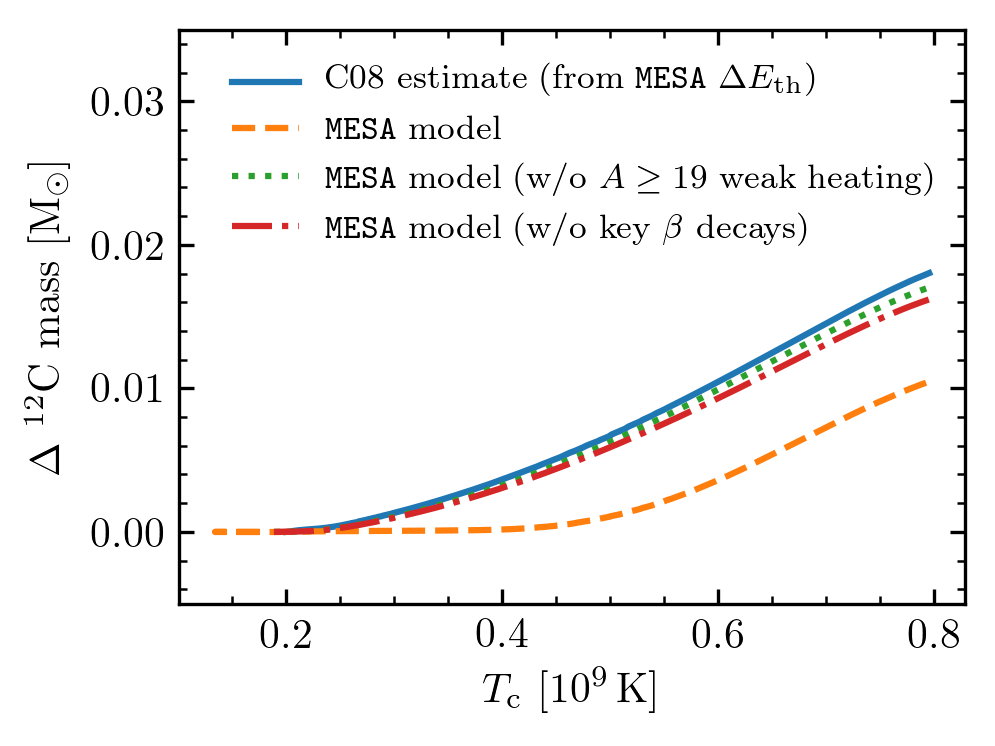

In [122]:
def get_xs_and_ys(name):
    data = read_tony(name)
    Tc = data['T_center']/1e9
    energy = data['e49']
    return Tc, energy

fig, ax = plt.subplots()
best_file = "1.37.2e8.dat"
xs, ys = get_xs_and_ys(best_file)
idx = np.argmin(np.abs(xs-0.85))
#ax.plot(xs[:idx], ys[:idx]/burnfac, label=r'PB08 estimate')


xs = 10**(mm.log_center_T-9)
idx = np.argmin(np.abs(xs-0.2))
deltae = (mm.e_thermal - mm.e_thermal[idx])
ys = deltae / (2.5e17 * 2e33) 
ax.plot(xs[idx:], ys[idx:], label =r'C08 estimate (from {\tt MESA} $\Delta E_{\rm th}$)', ls='solid')

xs = 10**(mm.log_center_T-9)
ys = mm.carbon_mass_burned
ax.plot(xs, ys, label =r'{\tt MESA} model', ls='dashed')

xs = 10**(n19.log_center_T-9)
ys = n19.carbon_mass_burned
ax.plot(xs, ys, label =r'{\tt MESA} model (w/o $A\ge19$ weak heating)', ls='dotted')

xs = 10**(nbd.log_center_T-9)
ys = nbd.carbon_mass_burned
ax.plot(xs, ys, label =r'{\tt MESA} model (w/o key $\beta$ decays)', ls='dashdot')


ax.legend(frameon=False, loc=(0.05, 0.60))

ax.set_xlabel(r'$T_{\rm c}$ [$10^9\,\rm K$]')
ax.set_ylabel(r'$\Delta$ $^{12}$C mass [${\rm M_\odot}$]')
ax.set_ylim(-0.005, 0.035)

fig.savefig('energy-vs-Tc-nwh.pdf', bbox_inches='tight')

# Figure 1

In [12]:
dP17 = mr.MesaData("mesa_output/LOGS-P17/history.data")
dlowC = mr.MesaData("mesa_output/LOGS-P17-lowC/history.data")
dMR16 = mr.MesaData("mesa_output/LOGS-MR16/history.data")

In [13]:
def get_simmering_pts(d):
    for i, mcc in enumerate(d.mass_conv_core):
        if mcc > 0:
            break
    return 10**(d.log_center_Rho[i]-9), 10**(d.log_center_T[i]-9)

In [65]:
def get_ignition_pts(d):
    for i, (eps_nuc, eps_neu) in enumerate(zip(d.center_eps_nuc, d.center_non_nuc_neu)):
        if eps_nuc > eps_neu:
            break
    return 10**d.log_center_Rho[i], 10**d.log_center_T[i]

In [66]:
def get_max_pts(d):
    i = np.argmax(d.log_center_Rho)
    return 10**d.log_center_Rho[i], 10**d.log_center_T[i]

In [67]:
def read_ignition_curve(filename):
    logRho, logT = np.loadtxt(filename, unpack=True, usecols=(0,1))
    return 10**logRho, 10**logT

0.000326682371241
0.000306838345196
0.000289194721388


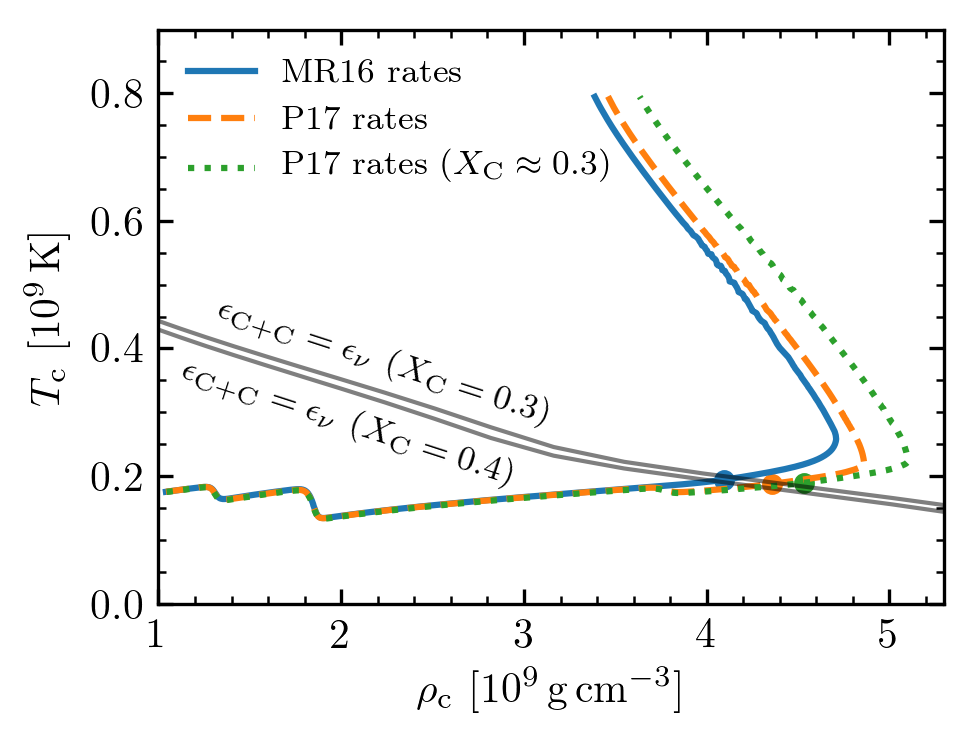

In [94]:
fig, ax = plt.subplots()

RhoScale = 1e9
TScale = 1e9

xs = 10**dMR16.log_center_Rho/RhoScale
ys = 10**dMR16.log_center_T/TScale
ax.plot(xs, ys, label = 'MR16 rates')

#ax.scatter(*get_ignition_pts(dstock))
ax.scatter(*get_simmering_pts(dMR16), color=ax.lines[-1].get_color())

print(dMR16.center_neutron_excess[-1] - dMR16.center_neutron_excess[0])


xs = 10**dP17.log_center_Rho/RhoScale
ys = 10**dP17.log_center_T/TScale
ax.plot(xs, ys, label = 'P17 rates', ls='dashed')

#ax.scatter(*get_ignition_pts(dstock))
ax.scatter(*get_simmering_pts(dP17), color=ax.lines[-1].get_color())

print(dP17.center_neutron_excess[-1] - dP17.center_neutron_excess[0])

xs, ys = read_ignition_curve('ignition-CO-XC0p4.dat')
ax.plot(xs/RhoScale, ys/TScale, color='Black', alpha=0.5, lw=1)
ax.text(1.1, 0.345, r'$\epsilon_{\rm C+C} = \epsilon_\nu\,\,(X_{\rm C} = 0.4)$', rotation=-18, size=8)

xs = 10**dlowC.log_center_Rho/RhoScale
ys = 10**dlowC.log_center_T/TScale
ax.plot(xs, ys, label = r'P17 rates ($X_{\rm C} \approx 0.3$)', ls='dotted')

#ax.scatter(*get_ignition_pts(dlowC))
ax.scatter(*get_simmering_pts(dlowC), color=ax.lines[-1].get_color())

print(dlowC.center_neutron_excess[-1] - dlowC.center_neutron_excess[0])

xs, ys = read_ignition_curve('ignition-CO-XC0p3.dat')
ax.plot(xs/RhoScale, ys/TScale, color='Black', alpha=0.5, lw=1)
ax.text(1.3, 0.44, r'$\epsilon_{\rm C+C} = \epsilon_\nu\,\,(X_{\rm C} = 0.3)$', rotation=-18, size=8)


ax.set_xlabel(r'$\rho_{\rm c}$ [$10^9\,\rm g\,cm^{-3}$]')
ax.set_ylabel(r'$T_{\rm c}$ [$10^9\,\rm K$]')
#ax.vlines([3.8e9, 4.3e9], 0, 1e9)
#ax.hlines([2.9e8], 0, 5e9)
ax.set_xlim(1.0, 5.3)
ax.set_ylim(0, 0.9)

ax.legend(frameon=False, loc=2)
fig.savefig('rates-rho-T.pdf', bbox_inches='tight')

# Figure 2

In [159]:
dmlt = mr.MesaData("mesa_output/LOGS-MR16/history.data")
dadv = mr.MesaData("mesa_output/LOGS-MR16-adv/history.data")
dadv_hr = mr.MesaData("mesa_output/LOGS-MR16-adv-hr/history.data")

0.000246735733592
1155
1209
0.000372266867256
1113
1224
0.000394361944384
3569
3957


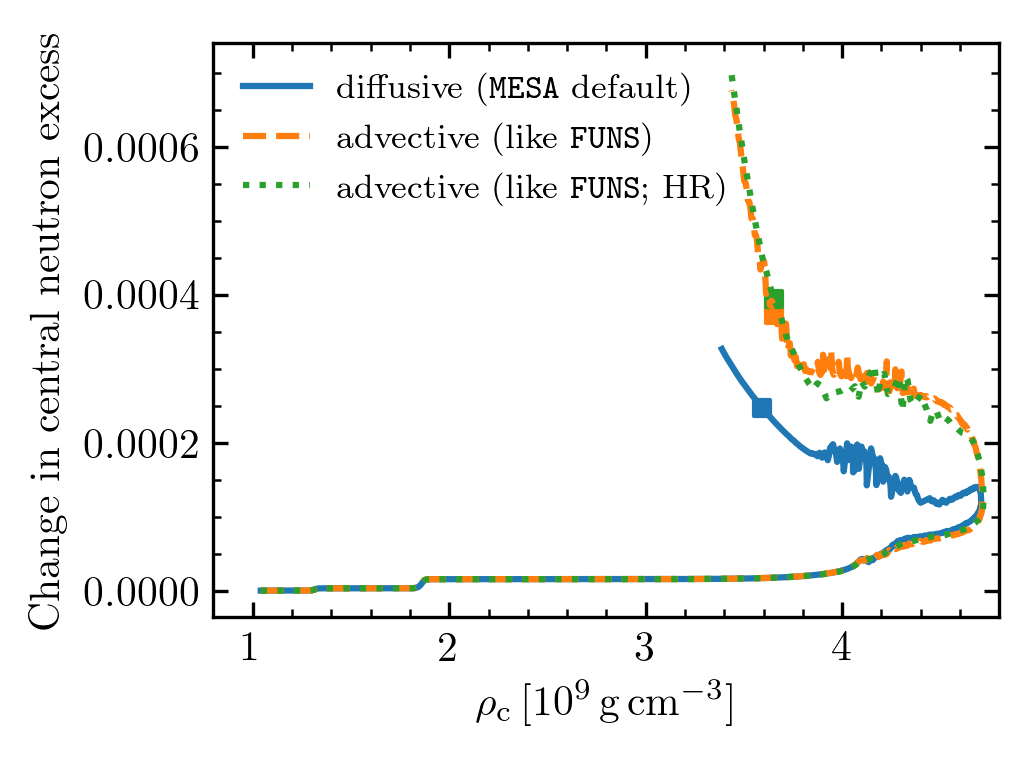

In [160]:
fig, ax = plt.subplots()

ds = [dmlt, dadv, dadv_hr]
labels = [r'diffusive (${\tt MESA}$ default)', r'advective (like ${\tt FUNS}$)', r'advective (like ${\tt FUNS}$; HR)']
lses = ['solid', 'dashed', 'dotted']


for d, l, ls in zip(ds, labels, lses) :
    xs = 10**(d.log_center_Rho-9)
    ys = d.center_neutron_excess - d.center_neutron_excess[0]
    ax.plot(xs, ys, label=l, ls=ls)
    
    # find T=7e7
    idx = np.argmin(np.abs(d.log_center_T - np.log10(7e8)))
    ax.scatter(xs[idx], ys[idx], marker='s')
    
    print(ys[idx])
    print(d.num_zones[-1])
    print(d.model_number[-1]-d.model_number[0])

ax.set_xlabel(r'$\rho_{\rm c}\, [10^9\,\rm g\,cm^{-3}]$')
ax.set_xlim(0.8, 4.8)
ax.set_ylabel(r'Change in central neutron excess')
#ax.set_title('mixing algorithm comparison (2017-06-14)')
ax.legend(frameon=False,loc=2)
fig.savefig('mixing-neutron-excess.pdf', bbox_inches='tight')

# Figure 3

In [126]:
dmlt = mr.MesaLogDir("mesa_output/LOGS-MR16")
dadv = mr.MesaLogDir("mesa_output/LOGS-MR16-adv")

7.02722629166
7.01178499629


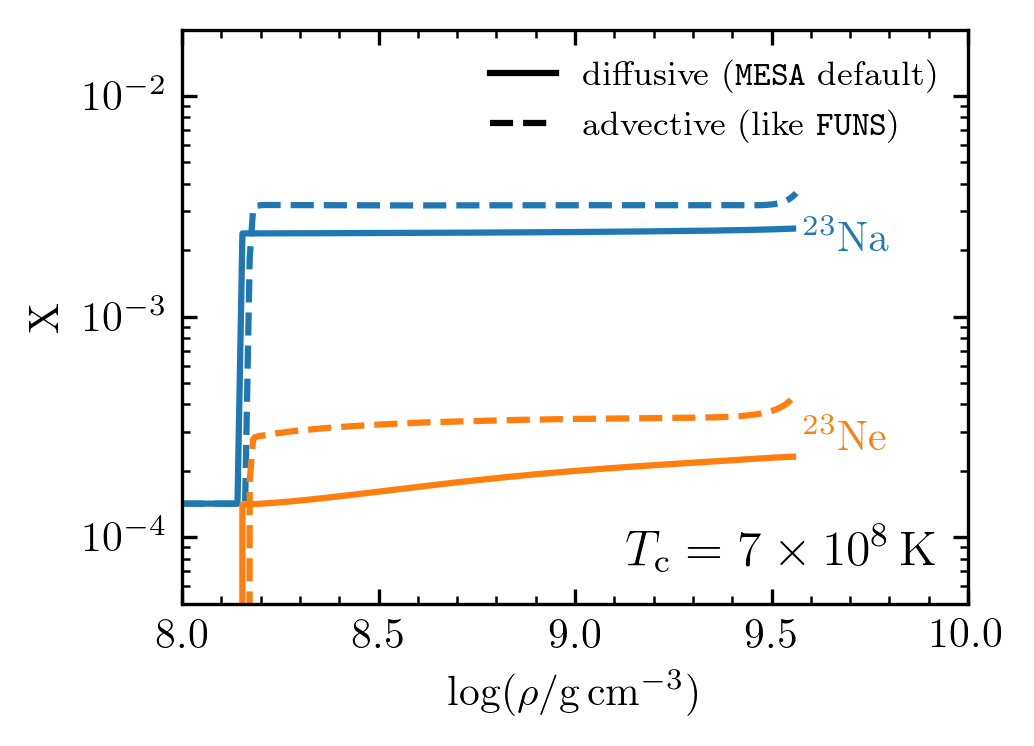

In [127]:
fig, ax = plt.subplots()

for d, l, ls in zip([dmlt, dadv], [r'diffusive (${\tt MESA}$ default)', r'advective (like ${\tt FUNS}$)'], ['solid', 'dashed']):
    p = d.profile_data(profile_number=d.profile_numbers[-2])
    print(10**(p.logT[-1]-8))
    ax.plot(p.logRho, p.na23, label=l, color='C0', ls=ls)
    ax.plot(p.logRho, p.ne23, color='C1', ls=ls)
    #ax.plot(p.logRho, p.ne23+p.na23, color='C2', ls=ls)


# show lines as black in legend
leg = ax.legend(frameon=False, loc=1)
for lh in leg.legendHandles:
    lh.set_color('black')

ax.text(9.13, 7.0e-5, r'$T_{\rm c} = 7\times10^8\,{\rm K}$', size=12)
ax.text(9.58, 0.0020, r'$^{23}$Na', size=10, color='C0')
ax.text(9.58, 0.00025, r'$^{23}$Ne', size=10, color='C1')

ax.set_xlabel(r'$\log(\rho/{\rm g\,cm^{-3}})$')
ax.set_ylabel('X')
ax.set_yscale('log')
ax.set_xlim(8,10)
ax.set_ylim(5e-5, 2e-2)
fig.savefig('mixing-A23-profiles.pdf', bbox_inches='tight')

# Figure 7

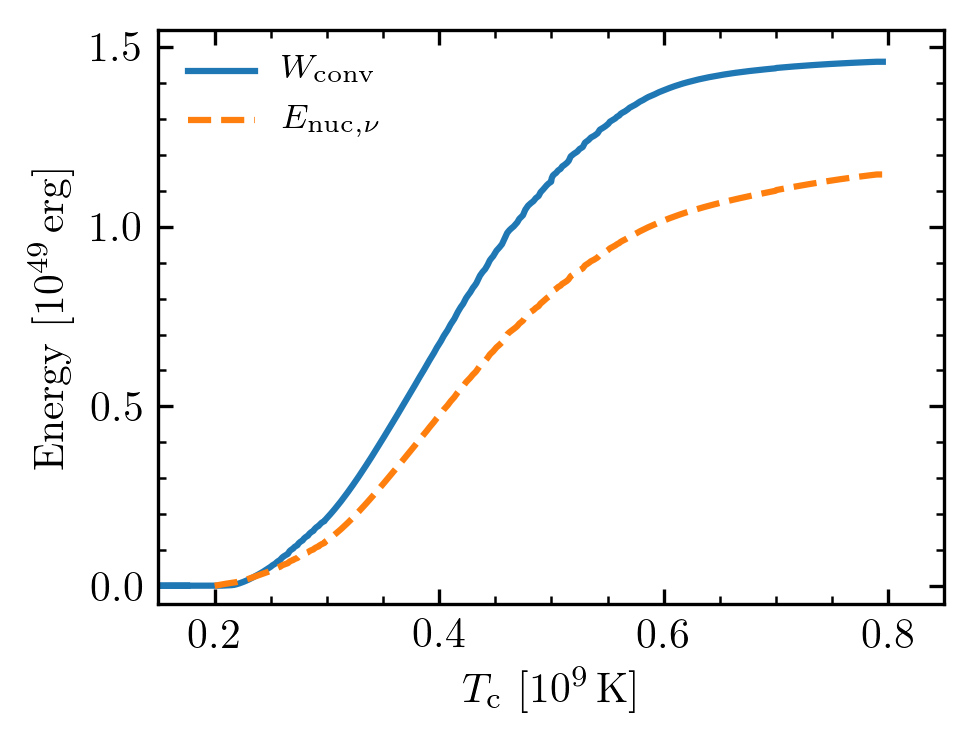

In [126]:
dP17 = mr.MesaData("mesa_output/LOGS-P17/history.data")

fig, ax = plt.subplots()    
xs = 10**(dP17.log_center_T-9)
ys1 = dP17.total_central_conv_work / 1e49
ax.plot(xs, -ys1, label=r'$W_{\rm conv}$')

ys2 = dP17.cumulative_nuc_neu / 1e49
idx = np.argmin(np.abs(xs-0.2))

ax.plot(xs[idx:], ys2[idx:]-ys2[idx], ls='dashed', label=r'$E_{\rm nuc,\nu}$')

ax.set_xlabel(r'$T_{\rm c}$ [$10^9\,\rm K$]')
ax.set_ylabel(r'Energy [$10^{49}\,\rm erg$]')

ax.legend()

ax.set_xlim(0.15, 0.85)
ax.set_ylim(-0.05, 1.55)
fig.savefig('Urca-energetics.pdf', bbox_inches='tight')